In [7]:
import matplotlib.pyplot as plt
from plotly.offline import iplot
import cufflinks as cf
from binance import Client
import pandas as pd
import algoind.indicators as ind

# Set up the api keys from Binance

api_key = "xxxx"
api_secret = "xxxx"

client = Client(api_key, api_secret)

# Getting data:

data = client.get_historical_klines("XRPUSDT", Client.KLINE_INTERVAL_4HOUR, "01 Apr, 2021", "15 Jul, 2021")


# Organizing data:

frame = pd.DataFrame(data)
frame = frame.iloc[:,:5]
frame.columns = ["Date", "Open", "High", "Low", "Close"]
frame = frame.set_index("Date")
frame.index = pd.to_datetime(frame.index, unit = "ms")
frame = frame.astype(float)

In [8]:
frame['EMA200'] = ind.EMA(frame.Close, 200)
frame['EMA50'] = ind.EMA(frame.Close, 50)

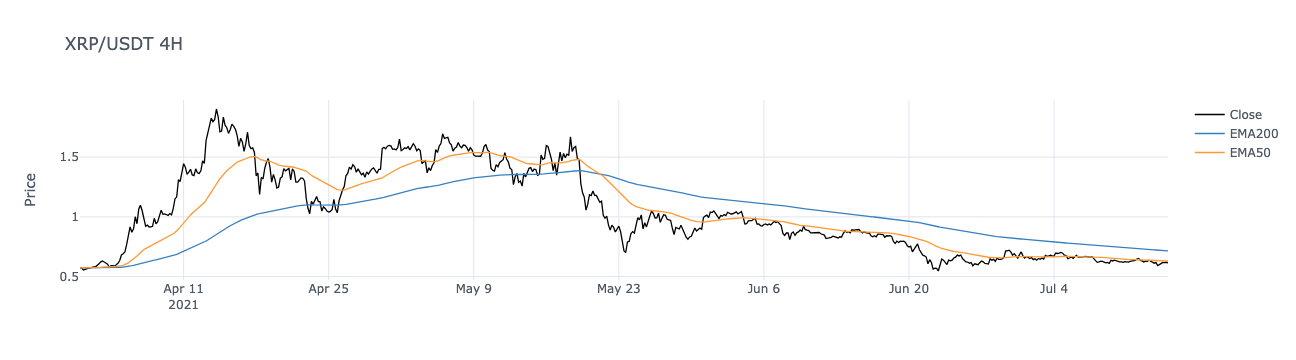

In [10]:
cf.go_offline() # It will make cufflinks offline
cf.set_config_file(offline = False, world_readable = True)
graph = frame[["Close", "EMA200", "EMA50"]] # data I want to plot (my db is called 'frame')
graph.iplot(kind = "line", color = ["black", 'blue', 'orange'], theme = "white", title = "XRP/USDT 4H", yTitle = "Price") # In this line, I can customize my graph